# HW02: Practice with logistic regression and decision tree

- Sichan Kim
- skim932@wisc.edu

## Hello Students:

- Start by downloading HW02.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- If you have questions, please ask them in class, office hours, or piazza. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW02.ipynb to Canvas's HW02.ipynb assignment
  - HW02.html to Canvas's HW02.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree # for tree.plot_tree()
from sklearn.tree import export_text # for export_text()


# 1. Logistic regression

# 1a. Make a logistic regression model
relating the probability an iris has Species='virginica' to its 'Petal.Length'
and classifying irises as 'virginica' or not 'virginica' (i.e. 'versicolor').
- Read [http://www.stat.wisc.edu/~jgillett/451/data/iris.csv](http://www.stat.wisc.edu/~jgillett/451/data/iris.csv) into a DataFrame.
- Make a second data frame that excludes the 'setosa' rows (leaving the 'virginica' and 'versicolor' rows) and includes only the Petal.Length and Species columns.
- Use `linear_model.LogisticRegression(C=1000)` so we all get the same results (they vary with `C`).
- Train the model using $X=$ petal length and $y=$ whether the Species is 'virginica'.
  (I used "y = (df['Species'] == 'virginica').to_numpy().astype(int)",
  which sets y to zeros and ones.)
- Report its accuracy on the training data.
- Report the estimated P(Species=virginica | Petal.Length=5).
- Report the predicited Species for Petal.Length=5.
- Make a plot showing:
  - the data points
  - the estimated logistic curve
  - and what I have called the "sample proportion" of y == 1 at each unique Petal.Length value
  - a legend and title and other labels necessary to make the plot easy to read

intercept=[-43.55550129], slope=[8.95564464], training score=0.93

0.772542197656312

[0.7725422]

The estimated P(Species = virginica | Peta.Lenght =5) is 0.772542197656312

The predicted species for (Petal.Lenght = 5) is 1


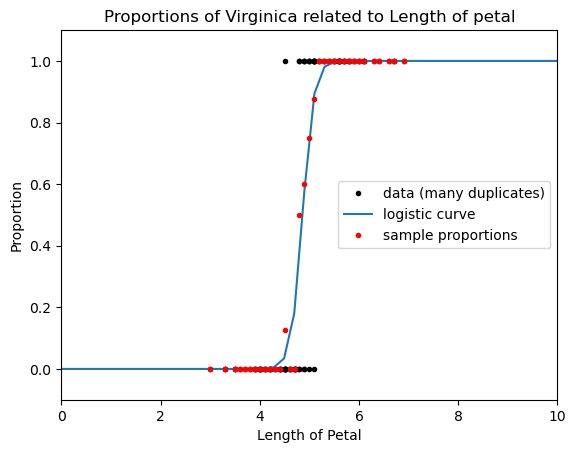

In [2]:
df_1 = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/iris.csv', index_col=0)
df_1 = df_1.reset_index()
df_2 = df_1[(df_1['Species']=='virginica') | (df_1['Species']=='versicolor')]
df_2 = df_2.loc[:,['Petal.Length','Species']]

x = df_2['Petal.Length'].to_numpy()
X = x.copy()
nrows = X.shape[0]
X.shape = (nrows, 1)
y = (df_2['Species']== 'virginica').to_numpy().astype(int)
model = linear_model.LogisticRegression(C=1000)
model.fit(X, y)
b = model.intercept_
w = model.coef_[0]
print(f'intercept={b}, slope={w}, training score={model.score(X, y)}')
probs = model.predict_proba(X)[:, 1]
print()
print(model.predict_proba(np.array([[5]]))[0][1])
ans = 1 / (1+np.exp(-(w*5+b)))
print()
print(ans)
print()
print(f'The estimated P(Species = virginica | Peta.Lenght =5) is {float(ans)}')
print()
my_model = model.predict(np.array([[5]]))
print(f'The predicted species for (Petal.Lenght = 5) is {int(my_model)}')

low = 0
high = 10
plt.plot(x, y, '.', color='black', label='data (many duplicates)')
plt.xlim(low, high)
margin = 0.1
plt.ylim(0 - margin, 1 + margin)
plt.title('Proportions of Virginica related to Length of petal')
plt.xlabel('Length of Petal')
plt.ylabel('Proportion')

xplot = np.linspace(start=low, stop=high)
yplot = 1 / (1 + np.exp(-(w * xplot + b)))
plt.plot(xplot, yplot, label='logistic curve')


x_values, x_counts = np.unique(X, return_counts=True)
n_x_values = x_values.shape[0]
success_proportion_per_x_value = np.zeros(n_x_values)
for i in np.arange(n_x_values):
    success_proportion_per_x_value[i] = np.sum(y[X[:, 0] == x_values[i]]) / x_counts[i]
plt.plot(x_values, success_proportion_per_x_value, '.', color='red',
         label='sample proportions')


plt.legend(loc='center right')
plt.show(block=False)

## 1b. Do some work with logistic regression by hand.
Consider the logistic regression model, $P(y
_i = 1) = \frac{1}{1 + e^{-(\mathbf{w x} + b)}}\,.$

Logistic regression is named after the log-odds of success, $\ln
  \frac{p}{1 - p}$, where $p = P(y_i = 1)$. Show that this log-odds
  equals $\mathbf{w x} + b$. (That is, start with $\ln
  \frac{p}{1 - p}$ and connect it in a series of equalities to $\mathbf{w x} + b$.)
  

#### ... Answer ...

$\begin{align*} % In this Latex context, "&" separates columns and "\\" ends a line.
   \ln \frac{p}{1 - p} = &  \ln\frac{\frac{1}{(1+e^{-(wx+b)})}} {\frac{e^{-(wx+b)}}{(1+e^{-(wx+b)}}} \\
    & = \ln\frac{\frac{e^{(wx+b)}}{1+e^{(wx+b)}}}  {\frac{1}{1+e^{(wx+b)}}}\\
    & = \ln{e^{(wx+b)}}\\
    & = \mathbf{w x} + b\\
 \end{align*}
$

### 1c. Do some more work with logistic regression by hand.

I ran some Python/scikit-learn code to make the model pictured here: ![](toyLogistic.png)

From the image and without the help of running code, match each code line from the top list with its output from the bottom list.

1. `model.intercept_`
2. `model.coef_`
3. `model.predict(X)`
4. `model.predict_proba(X)[:, 1]`

A. `array([0, 0, 0, 1])`,
B. `array([0.003, 0.5, 0.5, 0.997])`,
C. `array([5.832])`,
D. `array([0.])`

### Answer -> 1: D,  2:C ,3:A ,4:D

# 2. Decision tree

## 2a. Make a decision tree model on a Titanic data set.
Read the data from [http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv](http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv).

These data are described at [https://www.kaggle.com/competitions/titanic/data](https://www.kaggle.com/competitions/titanic/data) (click on the small down-arrow to see the "Data Dictionary"), which is where they are from.

- Retain only the Survived, Pclass, Sex, and Age columns.
- Display the  first seven rows (passengers).
  Notice that the Age column includes NaN, indicating a missing value.
- Drop rows with missing data via `df.dropna()`. Display your data frame's shape before
  and after dropping rows. (It should be (714, 4) after dropping rows.)
- Add a column called 'Female' that indicates whether a passenger is Female. You can make this column via `df.Sex == 'female'`. This gives bool values True and False, which are interpreted as 1 and 0 when used in an arithmetic context.
- Train a decision tree with `max_depth=None` to decided whether a passenger
  `Survived` from the other three columns. Report its accuracy (with 3 decimal places)
  on training data along with the tree's depth (which is available in `clf.tree_.max_depth`).
- Train another tree with `max_depth=2`. Report its accuracy (with 3 decimal places).
  Use `tree.plot_tree()` to display it, including feature_names to make the tree easy to read.

|--- female <= 0.50
|   |--- Pclass <= 1.50
|   |   |--- Age <= 53.00
|   |   |   |--- Age <= 17.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  17.50
|   |   |   |   |--- Age <= 22.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  22.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Age <= 33.50
|   |   |   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |   |   |--- Age <= 24.50
|   |   |   |   |   |   |   |   |   |--- Age <= 23.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Age >  23.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Age >  24.50
|   |   |   |   |   |   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Age >  26.50
|   |   |   |   |   |   |   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   | 

[Text(0.5, 0.8333333333333334, 'female <= 0.5\nentropy = 0.974\nsamples = 714\nvalue = [424, 290]'),
 Text(0.25, 0.5, 'Pclass <= 1.5\nentropy = 0.732\nsamples = 453\nvalue = [360, 93]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.969\nsamples = 101\nvalue = [61, 40]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.611\nsamples = 352\nvalue = [299, 53]'),
 Text(0.75, 0.5, 'Pclass <= 2.5\nentropy = 0.804\nsamples = 261\nvalue = [64, 197]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.314\nsamples = 159\nvalue = [9, 150]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.996\nsamples = 102\nvalue = [55, 47]')]

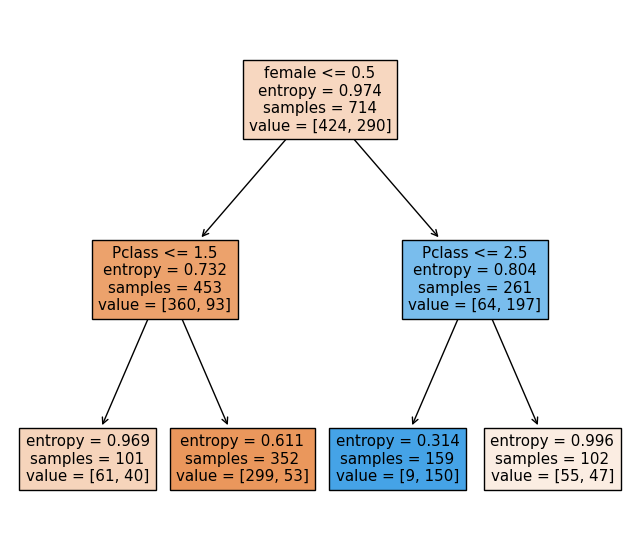

In [3]:
df_3 = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv')
df_4 = df_3.loc[:,["Survived","Pclass","Sex","Age"]]
df_4 = df_4.dropna()

df_4.insert(4,'female',df_4.Sex=='female')

feature_names = ['Pclass', 'Age',"female"]
X = df_4[feature_names].to_numpy()
y = df_4['Survived'].to_numpy()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
clf.fit(X, y)
plt.rcParams["figure.figsize"] = (8, 7) # (width, height) https://matplotlib.org/stable/api/figure_api.html
tree.plot_tree(clf, feature_names=feature_names)
print(export_text(clf, feature_names=feature_names))
print(f'clf.score(X, y)={round(clf.score(X, y),3)}')
print(f'The tree depth is {clf.tree_.max_depth}')
print()
clf_2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
clf_2.fit(X, y)
print(f'data is clf_2.score(X, y) which max_depth is 2 = {round(clf_2.score(X, y),2)}')
print(f'The tree depth is {clf_2.tree_.max_depth}')
tree.plot_tree(clf_2, feature_names=feature_names, filled=True)

## 2b. Which features are used in the (max_depth=2) decision-making? Answer in a markdown cell.

### Answer: Two features of 'pclass' , 'female' and 'age' are used in the (max_depth=2) decision-making

 ## 2c. What proportion (in the cleaned-up data) of females survived? What proportion of males survived?
 Answer in two sentences via print(), with each proportion rounded to three decimal places.
 
 Hint: There are many ways to do this. One quick way is to find the average of the `Female`
 column for each subset.

In [4]:

print(f'proportion of females survives: {round(df_4[df_4["female"] == True].Survived.mean(),3)}')
print(f'proportion of females survives: {round(df_4[df_4["female"] == False].Survived.mean(),3)}')

proportion of females survives: 0.755
proportion of females survives: 0.205


## 2d. Do some decision tree calculations by hand.
Consider a decision tree node containing the following set of examples $S =
\{(\mathbf{x}, y)\}$ where $\mathbf{x} = (x_1, x_2)$:

((4, 9), 1)

((2, 6), 0)

((5, 7), 0)

((3, 8), 1)

Find the entropy of $S$.

##### I used entropy formula which is H(S)
- P(y=0) = 1/2
- P(y=1) = 1/2
- H(S) = P(0)*(-log2P(0)) + P(1)*(-log2P(1))
-      = 1/2 + 1/2
-      = 1

 ## 2e. Do some more decision tree calculations by hand.
Find a (feature, threshold) pair that yields the best split for this node.

### Answer:
- meaning a (feature, threshold) pair that yields the best split is the same meaning with entropy close to 0
- (X2, 7.5) pair yields the best split for this node.
- 6 and 7 are class 0, 8 and 9 are class 1. Therefore we can split it right down the middle and get 7.5